# **TelecomX Latam - Análisis de Evasión de Clientes**

##📌 **Extracción**

### **Extracción de Datos**

#### 1. Importación de la Biblioteca Pandas

In [ ]:
import pandas as pd
import requests
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### 2. Cargar los datos directamente desde el API

In [ ]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"   # <-- reemplaza con tu endpoint real
response = requests.get(url)
datos = response.json()

#### 3. Convertir los datos a un DataFrame

In [ ]:
df_principal = pd.DataFrame(datos)

#### 4. Mostrar primeras filas

In [ ]:
df_principal.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##🔧 **Transformación**

### **Conocer el conjunto de datos**

#### 1. Explorar las columnas del dataset y verificar sus tipos de datos

In [ ]:
df_principal.shape

(7267, 6)

In [ ]:
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
df_principal.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [ ]:
df_principal.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

#### 2. Identificación de columnas relevantes para el análisis de evasión

In [ ]:
relevantes = ["customerID", "Churn", "gender", "SeniorCitizen", "Partner", "Dependents",
              "tenure", "InternetService", "OnlineSecurity", "TechSupport",
              "Contract", "PaperlessBilling", "PaymentMethod", "Charges.Monthly", "Charges.Total"]
print("\nColumnas más relevantes para el Análisis de la Evasión de Clientes:", relevantes)


Columnas más relevantes para el Análisis de la Evasión de Clientes: ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


### **Comprobación de incoherencias en los Datos**

#### 1. Valores Ausentes

In [ ]:
print("\nValores nulos por columna:")
print(df_principal.isnull().sum())


Valores nulos por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


#### 2. Valores Duplicados

In [ ]:
# Paso 1: Identificar columnas con diccionarios
columnas_con_dict = [col for col in df_principal.columns if df_principal[col].apply(lambda x: isinstance(x, dict)).any()]
print("Columnas con diccionarios:", columnas_con_dict)

# Paso 2: Excluir esas columnas al buscar duplicados
columnas_sin_dict = [col for col in df_principal.columns if col not in columnas_con_dict]

# Paso 3: Verificar duplicados solo en columnas válidas
print("\nValores duplicados en el DataFrame:")
print(df_principal[columnas_sin_dict].duplicated().sum())

Columnas con diccionarios: ['customer', 'phone', 'internet', 'account']

Valores duplicados en el DataFrame:
0


#### 3. Convertir diccionarios a strings para que sean hashables

In [ ]:
# Convertir dicts a strings para que sean hashables
for col in columnas_con_dict:
    df_principal[col] = df_principal[col].apply(lambda x: str(x) if isinstance(x, dict) else x)

# Ahora puedes usar duplicated() normalmente
print("\nDiccionarios convertidos a texto):")
print(df_principal.duplicated().sum())


Diccionarios convertidos a texto):
0


### **Manejo de Inconsistencias**

#### 1. Eliminar duplicados

In [ ]:
df_principal = df_principal.drop_duplicates()

#### 2. Rellenar valores nulos texto en cursiva

In [ ]:
df_principal = df_principal.fillna({
    "OnlineSecurity": "No",
    "OnlineBackup": "No",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No"
})

#### 3. Columnas del DataFrame

In [ ]:
print("Columnas disponibles en el DataFrame:")
print(df_principal.columns.tolist())

Columnas disponibles en el DataFrame:
['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


#### 4. Extraer los datos del diccionario y convertirlos en columnas numericas

In [ ]:
df_principal['Charges.Monthly'] = df_principal['account'].apply(lambda x: ast.literal_eval(x).get('Charges', {}).get('Monthly') if isinstance(x, str) else None)
df_principal['Charges.Total'] = df_principal['account'].apply(lambda x: ast.literal_eval(x).get('Charges', {}).get('Total') if isinstance(x, str) else None)
df_principal['Charges.Monthly'] = pd.to_numeric(df_principal['Charges.Monthly'], errors='coerce').fillna(0)
df_principal['Charges.Total'] = pd.to_numeric(df_principal['Charges.Total'], errors='coerce').fillna(0)

#### 5. Rellenar posibles NaN en cargos con 0

In [ ]:
df_principal["Charges.Monthly"] = df_principal["Charges.Monthly"].fillna(0)
df_principal["Charges.Total"] = df_principal["Charges.Total"].fillna(0)

### **Columna de Cuentas Diarias**

#### 1. Crear columna de Cuentas Diarias

In [ ]:
df_principal["Cuentas_Diarias"] = df_principal["Charges.Monthly"] / 30

In [ ]:
print("\nNueva columna 'Cuentas_Diarias' creada:")
df_principal[["Charges.Monthly", "Cuentas_Diarias"]].head()


Nueva columna 'Cuentas_Diarias' creada:


,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


### **Estandarización y Transformación de Datos**

#### 1. Extraer los datos de las columnas que estan dentro de los diccionarios

In [ ]:
columnas_dict = ["customer", "phone", "internet", "account"]

def expandir_diccionario(df, columna):
    if columna in df.columns:
        # Convertir strings a dicts si es necesario
        df[columna] = df[columna].apply(
            lambda x: ast.literal_eval(x) if isinstance(x, str) else x
        )

        # Crear DataFrame con claves como columnas (incluye tenure si existe)
        df_expandido = pd.json_normalize(df[columna])

        # Renombrar columnas con prefijo
        df_expandido.columns = [f"{columna}_{clave}" for clave in df_expandido.columns]

        # Concatenar y eliminar la columna original
        df.drop(columns=[columna], inplace=True)
        df = pd.concat([df, df_expandido], axis=1)

    return df

# Aplicar expansión
for col in columnas_dict:
    df_principal = expandir_diccionario(df_principal, col)

# Confirmar si tenure está presente
print("Columnas expandidas:")
print(df_principal.columns.tolist())

Columnas expandidas:
['customerID', 'Churn', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total']


#### 2. Renombrar columnas

In [ ]:
df_principal = df_principal.rename(columns={
    "customer_gender": "Gender",
    "customer_Partner": "Partner",
    "customer_Dependents": "Dependents",
    "customer_tenure": "Tenure",
    "customer_SeniorCitizen": "SeniorCitizen",
    "phone_PhoneService": "PhoneService",
    "phone_MultipleLines": "MultipleLines",
    "internet_InternetService": "InternetService",
    "internet_OnlineSecurity": "OnlineSecurity",
    "internet_OnlineBackup": "OnlineBackup",
    "internet_DeviceProtection": "DeviceProtection",
    "internet_TechSupport": "TechSupport",
    "internet_StreamingTV": "StreamingTV",
    "internet_StreamingMovies": "StreamingMovies",
    "account_Contract": "Contract",
    "account_PaperlessBilling": "PaperlessBilling",
    "account_PaymentMethod": "PaymentMethod",
    "Cuentas_Diarias": "Charges.Daily"
})

#### 3. Eliminar columnas innecesarias

In [ ]:
# Lista de columnas a eliminar
cols_a_eliminar = ['account_Charges.Monthly', 'account_Charges.Total']

# Eliminar columnas del DataFrame
df_principal = df_principal.drop(columns=cols_a_eliminar, errors="ignore")

# Confirmar resultado
print("Columnas actuales después de eliminar:")
print(df_principal.columns.tolist())

Columnas actuales después de eliminar:
['customerID', 'Churn', 'Charges.Monthly', 'Charges.Total', 'Charges.Daily', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


#### 4. Convertir valores textuales Sí/No a binarios

In [ ]:
# Columnas binarias a mapear
binarias = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]

# Mapear Yes/No a 1/0 en todas las columnas binarias
for col in binarias:
    if col in df_principal.columns:
        if df_principal[col].dtype == "object":
            df_principal[col] = df_principal[col].map({"Yes": 1, "No": 0}).fillna(df_principal[col])
    else:
        print(f"⚠️ Advertencia: La columna '{col}' no se encuentra en el DataFrame.")

#### 5. SeniorCitizen ya es binaria (0/1), aseguramos tipo entero

In [ ]:
# Asegurarse de que 'SeniorCitizen' se extraiga primero si está anidado en 'customer'
if 'SeniorCitizen' not in df_principal.columns and 'customer' in df_principal.columns:
    df_principal['SeniorCitizen'] = df_principal['customer'].apply(
        lambda x: ast.literal_eval(x).get('SeniorCitizen') if isinstance(x, str) else None
    )

# Asegurarse de que sea de tipo entero. Gestión de posibles valores no numéricos.
df_principal["SeniorCitizen"] = pd.to_numeric(df_principal["SeniorCitizen"], errors='coerce').fillna(0).astype(int)

#### 6. Reordenar columnas

In [ ]:
cols = list(df_principal.columns)
# Eliminar las columnas que vamos a reubicar
for col in ["Charges.Daily", "Charges.Monthly", "Charges.Total"]:
    if col in cols:
        cols.remove(col)
idx = cols.index("PaymentMethod")
cols = cols[:idx+1] + ["Charges.Daily", "Charges.Monthly", "Charges.Total"] + cols[idx+1:]
df_principal = df_principal[cols]

#### 7. Estilización del DataFrame

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.colheader_justify', 'center')

#### 8. Verificación final de las columnas y sus tipos de datos despúes de la Transformación

In [ ]:
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   Gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   Tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#### 8. Mostrar el DataFrame despúes de la Transformación

In [ ]:
df_principal.head(5)

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
0,0002-ORFBO,0.0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,2.186667,65.6,593.30
1,0003-MKNFE,0.0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,1.996667,59.9,542.40
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,2.463333,73.9,280.85
3,0011-IGKFF,1.0,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,3.266667,98.0,1237.85
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,2.796667,83.9,267.40


#### 9. Guardar el DataFrame en varios archivos

In [ ]:
df_principal.to_csv("/content/drive/MyDrive/Challenge-TelecomX-LATAM/TelecomX_Transformacion_Final.csv", index=False)

In [ ]:
df_principal.to_excel("/content/drive/MyDrive/Challenge-TelecomX-LATAM/TelecomX_Transformacion_Final.xlsx", index=False)

In [ ]:
df_principal.to_json("/content/drive/MyDrive/Challenge-TelecomX-LATAM/TelecomX_Transformacion_Final.json", index=False)

## 📊 **Carga y análisis**

###**Análisis Descriptivo**

#### 1. Estadísticas descriptivas básicas

In [ ]:
desc_stats = df_principal.describe(include='all')
desc_stats

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
count,7267,7267.0,7267,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267,7267.000000,7267.000000,7267.000000
unique,7267,3.0,2,NaN,NaN,NaN,NaN,NaN,3,3,3,3,3,3,3,3,3,NaN,4,NaN,NaN,NaN
top,9995-HOTOH,0.0,Male,NaN,NaN,NaN,NaN,NaN,No,Fiber optic,No,No,No,No,No,No,Month-to-month,NaN,Electronic check,NaN,NaN,NaN
freq,1,5174.0,3675,NaN,NaN,NaN,NaN,NaN,3495,3198,3608,3182,3195,3582,2896,2870,4005,NaN,2445,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.162653,0.484106,0.300124,32.346498,0.902711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.593230,NaN,2.157337,64.720098,2277.182035
std,NaN,NaN,NaN,0.369074,0.499782,0.458343,24.571773,0.296371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.491265,NaN,1.004319,30.129572,2268.648587
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.608333,18.250000,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.180833,35.425000,396.200000
50%,NaN,NaN,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2.343333,70.300000,1389.200000
75%,NaN,NaN,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2.995833,89.875000,3778.525000


#### 2. Métricas adicionales

In [ ]:
medianas = df_principal.median(numeric_only=True)
desviaciones = df_principal.std(numeric_only=True)
modas = df_principal.mode().iloc[0]
print("Medianas:\n", medianas)
print("Desviaciones estándar:\n", desviaciones)
print("Modas:\n", modas)

Medianas:
 SeniorCitizen          0.000000
Partner                0.000000
Dependents             0.000000
Tenure                29.000000
PhoneService           1.000000
PaperlessBilling       1.000000
Charges.Daily          2.343333
Charges.Monthly       70.300000
Charges.Total       1389.200000
dtype: float64
Desviaciones estándar:
 SeniorCitizen          0.369074
Partner                0.499782
Dependents             0.458343
Tenure                24.571773
PhoneService           0.296371
PaperlessBilling       0.491265
Charges.Daily          1.004319
Charges.Monthly       30.129572
Charges.Total       2268.648587
dtype: float64
Modas:
 customerID                0002-ORFBO
Churn                            0.0
Gender                          Male
SeniorCitizen                    0.0
Partner                          0.0
Dependents                       0.0
Tenure                           1.0
PhoneService                     1.0
MultipleLines                     No
InternetService   

#### 3. Distribución de valores nulos

In [ ]:
missing_values = df_principal.isnull().sum()
missing_values

,0
customerID,0
Churn,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


#### 4. Distribución por columnas categóricas

In [ ]:
for col in df_principal.select_dtypes(include='object').columns:
    print(f"\nDistribución de {col}:")
    print(df_principal[col].value_counts(normalize=True).head(10))


Distribución de customerID:
customerID
9995-HOTOH    0.000138
0002-ORFBO    0.000138
0003-MKNFE    0.000138
9970-QBCDA    0.000138
9968-FFVVH    0.000138
9967-ATRFS    0.000138
9966-VYRTZ    0.000138
9965-YOKZB    0.000138
9964-WBQDJ    0.000138
9962-BFPDU    0.000138
Name: proportion, dtype: float64

Distribución de Churn:
Churn
0.0    0.711986
1.0    0.257190
       0.030824
Name: proportion, dtype: float64

Distribución de Gender:
Gender
Male      0.505711
Female    0.494289
Name: proportion, dtype: float64

Distribución de MultipleLines:
MultipleLines
No                  0.480941
Yes                 0.421770
No phone service    0.097289
Name: proportion, dtype: float64

Distribución de InternetService:
InternetService
Fiber optic    0.440072
DSL            0.342370
No             0.217559
Name: proportion, dtype: float64

Distribución de OnlineSecurity:
OnlineSecurity
No                     0.496491
Yes                    0.285950
No internet service    0.217559
Name: proportion, 

### **Distribución de la Evasión**

#### 1. Visualizaciones

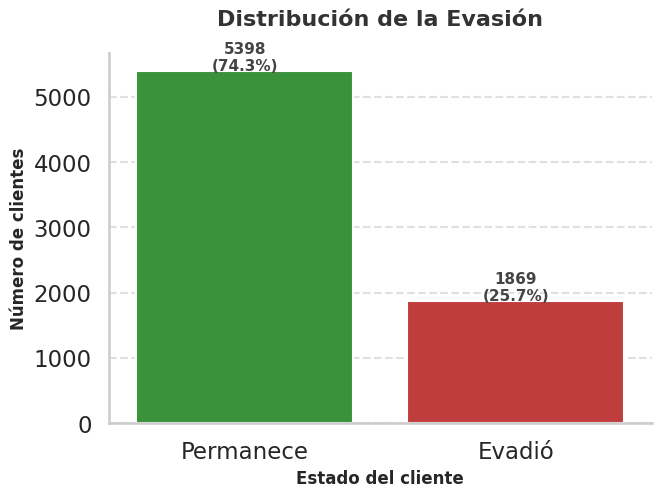

In [ ]:
# --- Limpieza de la columna 'Churn' ---
# Convertir directamente a numérico: cadenas vacías o valores inválidos se convierten en NaN
df_principal['Churn'] = pd.to_numeric(df_principal['Churn'], errors='coerce')

# Rellenar NaN con 0 y asegurar tipo entero
df_principal['Churn'] = df_principal['Churn'].fillna(0).astype(int)

# --- Conteo de clientes ---
churn_counts = df_principal['Churn'].value_counts()

# Etiquetas claras
labels = ["Permanece", "Evadió"]

# Crear DataFrame para graficar
churn_plot_df = pd.DataFrame({
    "Estado": labels,
    "Cantidad": churn_counts.sort_index().values
})

# --- Gráfico ---
plt.figure(figsize=(7,5))
sns.set(style="whitegrid", context="talk")

# Barras con paleta personalizada
ax = sns.barplot(
    x="Estado",
    y="Cantidad",
    hue="Estado",
    data=churn_plot_df,
    palette=["#2ca02c", "#d62728"],  # Verde = Permanece, Rojo = Evadió
    legend=False
)

# Título estilizado
plt.title("Distribución de la Evasión", fontsize=16, weight='bold', color="#333", pad=20)

# Etiquetas de ejes en negrita
plt.xlabel("Estado del cliente", fontsize=12, weight='bold')
plt.ylabel("Número de clientes", fontsize=12, weight='bold')

# Mostrar valores y porcentajes encima de cada barra
for i, val in enumerate(churn_counts.sort_index().values):
    plt.text(
        i, val + 5,
        f"{val}\n({val/churn_counts.sum():.1%})",
        ha='center', fontsize=11, color="#444", weight='bold'
    )

# Quitar bordes superiores y derechos
sns.despine()

# Líneas de guía horizontales
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Ajustar espacio superior
plt.subplots_adjust(top=0.85)

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/Challenge-TelecomX-Latam-Graficos/Grafico-Distribucion-Evasion.png", dpi=300, bbox_inches="tight")

# Mostrar gráfico
plt.show()

### **Distribución de Evasión por variable Categóricas**

#### 1. Visualizaciones

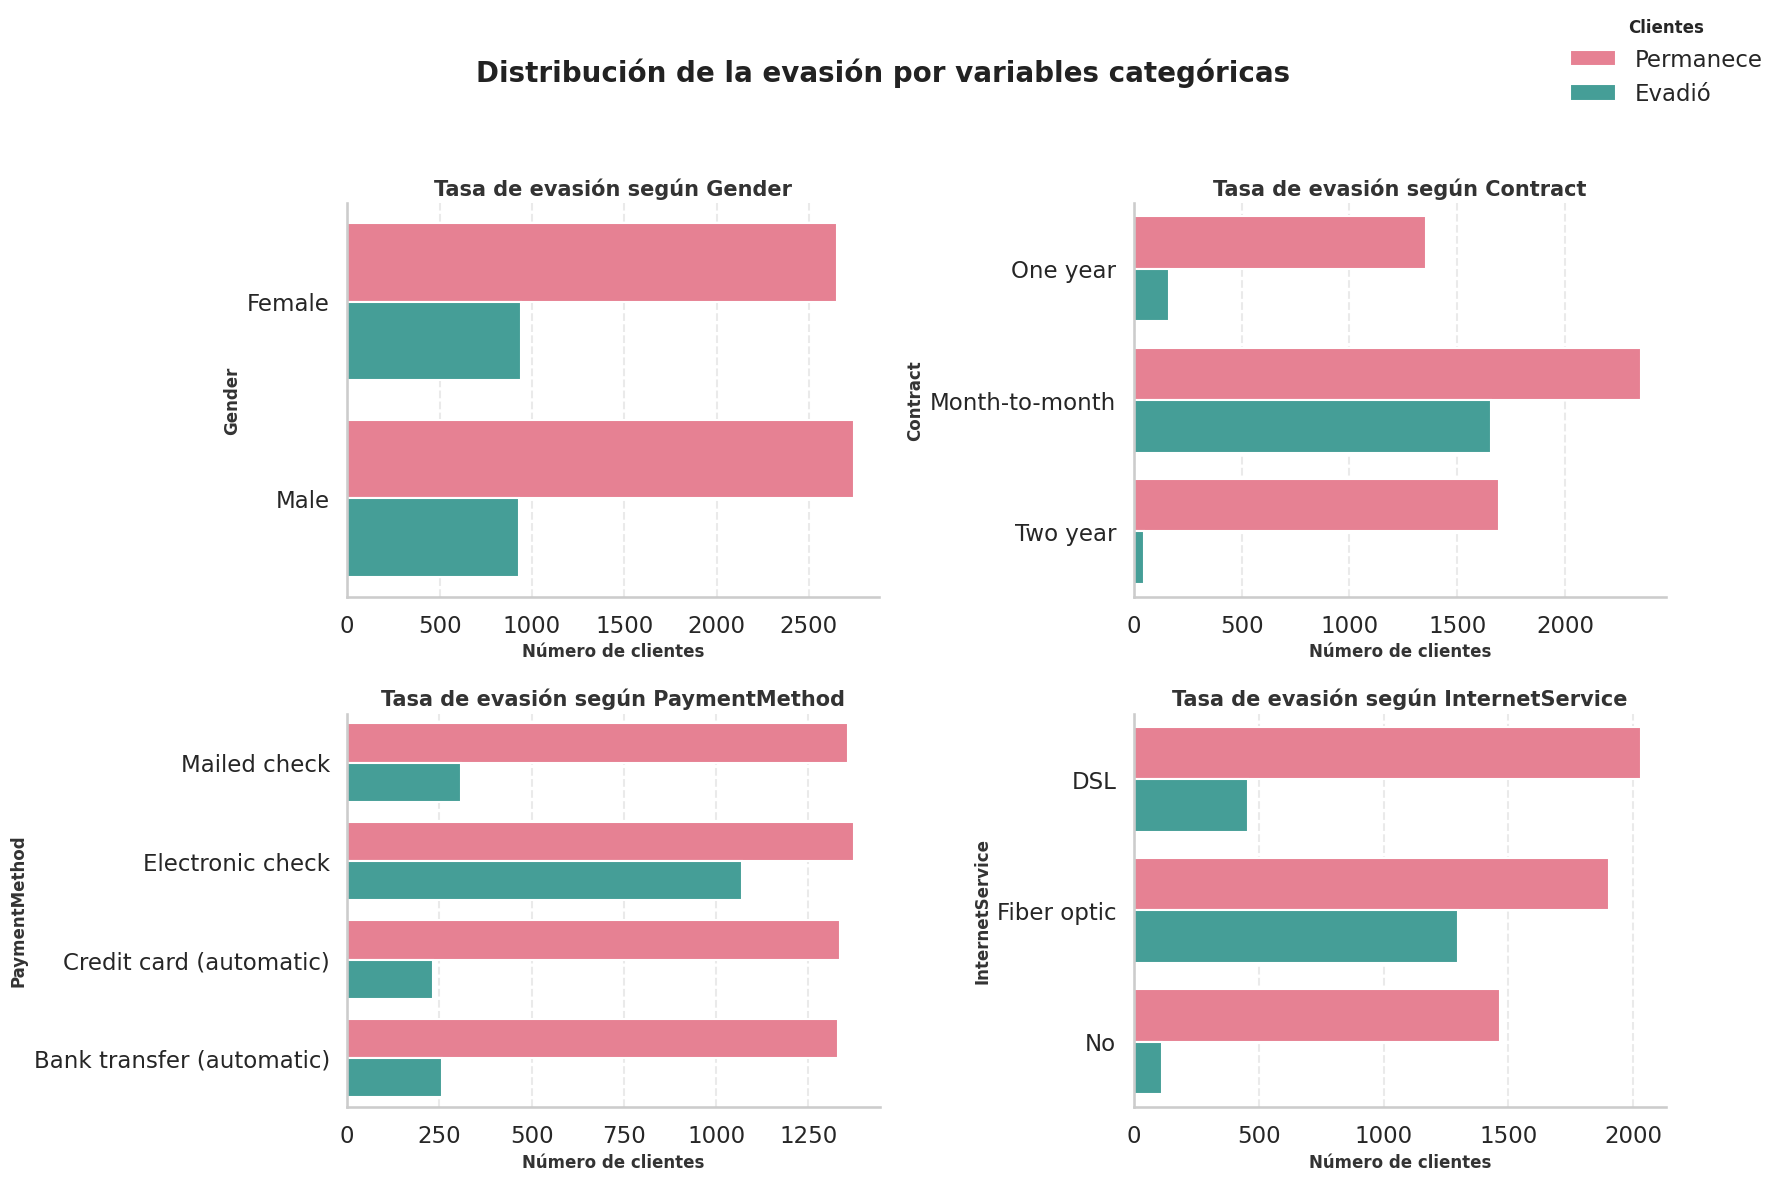

In [ ]:
# Variables categóricas
categorical_vars = ['Gender', 'Contract', 'PaymentMethod', 'InternetService']

# Crear subplots en 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(18,12))

# Paleta con solo 2 colores (evita el warning)
palette = sns.color_palette("husl", 2)

# Iterar sobre variables y ejes
for i, var in enumerate(categorical_vars):
    row = i // 2   # fila
    col = i % 2    # columna

    # Gráfico de barras horizontales
    ax = sns.countplot(data=df_principal, y=var, hue='Churn', palette=palette, ax=axes[row][col])

    # Título estilizado
    axes[row][col].set_title(f"Tasa de evasión según {var}", fontsize=15, weight='bold', color="#333")

    # Etiquetas de ejes
    axes[row][col].set_xlabel("Número de clientes", fontsize=12, weight='bold', color="#333")
    axes[row][col].set_ylabel(var, fontsize=12, weight='bold', color="#333")

    # Quitar leyenda individual
    axes[row][col].legend_.remove()

    # Líneas guía sutiles
    axes[row][col].grid(axis="x", linestyle="--", alpha=0.4)

    # Quitar bordes innecesarios
    sns.despine(ax=axes[row][col])

# Crear una sola leyenda global en la parte superior derecha
handles, labels = axes[0][0].get_legend_handles_labels()
legend = fig.legend(handles, ["Permanece","Evadió"], title="Clientes",
           loc="upper right", bbox_to_anchor=(1,1), frameon=False)
plt.setp(legend.get_title(), fontsize=12, weight='bold')

# Ajustar espaciado general
plt.suptitle("Distribución de la evasión por variables categóricas",
             fontsize=20, weight='bold', color="#222", y=0.95)  # título más cerca de los gráficos

plt.tight_layout(rect=[0,0,0.95,0.92])  # deja espacio para la leyenda y acerca los gráficos al título
# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/Challenge-TelecomX-Latam-Graficos/Grafico-Distribucion-Evasion-Variables-Categoricas.png", dpi=300, bbox_inches="tight")
plt.show()

### **Evasión por Método de Pago**

#### 1. Visualizaciones

In [ ]:
import plotly.express as px
# Agrupar datos
df_payment = df_principal.groupby(['PaymentMethod','Churn']).size().reset_index(name='Cantidad')

# Crear gráfico interactivo
fig = px.bar(
    df_payment,
    x="Cantidad",
    y="PaymentMethod",
    color="Churn",
    orientation="h",
    barmode="group",
    labels={
        "Cantidad":"<b>Cantidad de Clientes</b>",
        "PaymentMethod":"<b>Método de Pago</b>",
        "Churn":"<b>Estado del Cliente</b>"
    },
    color_discrete_map={0:"green", 1:"purple"},
    title="<b>Evasión por Método de Pago</b>"
)

# Ajustes visuales: título centrado y leyenda en negrita
fig.update_layout(
    template="plotly_white",
    font=dict(size=14, family="Arial", color="black"),
    title=dict(
        text="<b>Evasión por Método de Pago</b>",
        x=0.5,  # Centrado
        xanchor="center",
        font=dict(size=20, family="Arial", color="black")
    ),
    legend=dict(
        title=dict(text="<b>Estado del Cliente</b>"),
        font=dict(size=14, family="Arial", color="black")
    )
)

fig.show()


### **Evolución de Cargos Mensuales según Tenure**

#### 1. Visualizaciones

In [ ]:
import plotly.express as px

# Agrupar datos
df_lineal = df_principal.groupby(['Tenure','Churn'])['Charges.Monthly'].mean().reset_index()

# Crear gráfico interactivo con etiquetas en negrita
fig = px.line(
    df_lineal,
    x="Tenure",
    y="Charges.Monthly",
    color="Churn",
    markers=True,
    title="<b>Evolución interactiva de Cargos Mensuales según Tenure</b>",
    labels={
        "Tenure":"<b>Tiempo de Permanencia Cliente (meses)</b>",
        "Charges.Monthly":"<b>Promedio de Cargo Mensual ($)</b>",
        "Churn":"<b>Estado del Cliente</b>"
    },
    color_discrete_map={0:"green", 1:"purple"}
)

# Ajustes visuales
fig.update_layout(
    template="plotly_white",
    hovermode="x unified",
    font=dict(size=14, family="Arial", color="black"),
    legend=dict(
        title=dict(text="<b>Evasión</b>"),
        font=dict(size=14, family="Arial", color="black")
    ),
    # Título centrado y en negrita
    title=dict(
        text="<b>Evolución interactiva de Cargos Mensuales según Tenure</b>",
        x=0.5,  # Centrado
        xanchor="center",
        font=dict(size=20, family="Arial", color="black")
    )
)

fig.show()

### **Proporcion de la Evasión**

#### 1. Visualizaciones

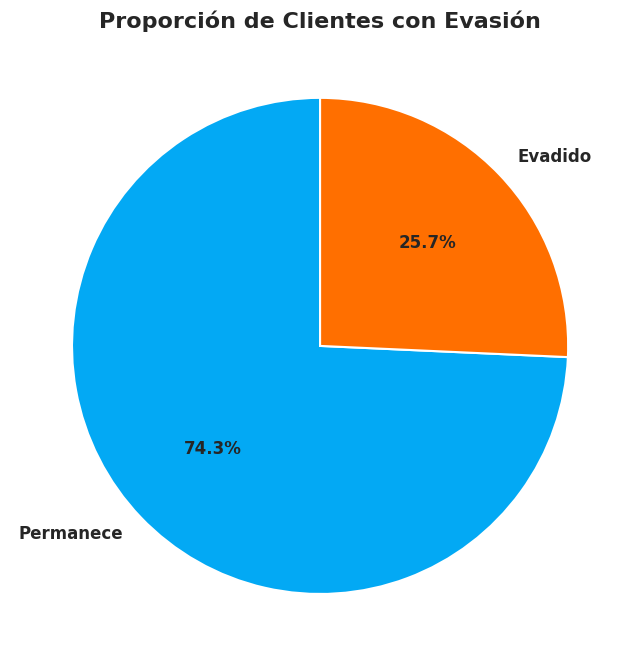

In [ ]:
# Conteo de evasión
evasión_counts = df_principal['Churn'].value_counts()

# Crear gráfico de pastel
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    evasión_counts,
    labels=['Permanece','Evadido'],
    autopct='%1.1f%%',
    colors=['#03A9F4','#FF6F00'],
    startangle=90,
    textprops={'fontsize':12, 'fontweight':'bold'}  # etiquetas en negrita
)

# Estilo de porcentajes en negrita
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

# Título en negrita
plt.title("Proporción de Clientes con Evasión", fontsize=16, fontweight='bold')

plt.tight_layout()
# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/Challenge-TelecomX-Latam-Graficos/Grafico-Proporcion-Clientes-Evasion.png", dpi=300, bbox_inches="tight")
plt.show()

### **Mapa de Correlaciones**

#### 1. Visualizaciones

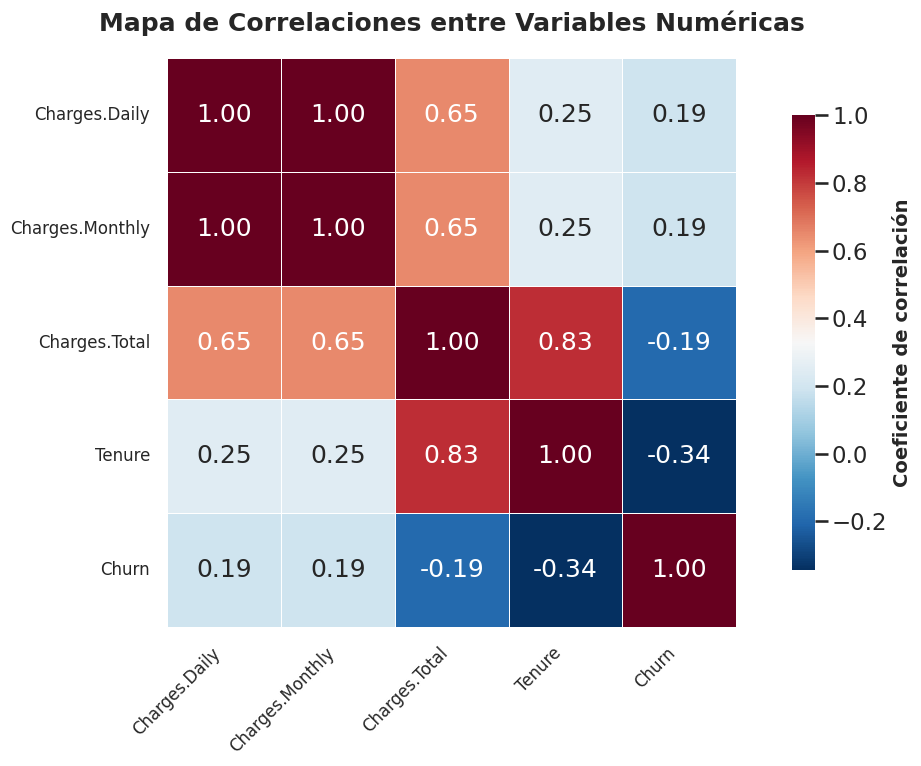

In [ ]:
# Calcular correlaciones
corr = df_principal[['Charges.Daily','Charges.Monthly','Charges.Total','Tenure','Churn']].corr()

plt.figure(figsize=(12,8))
ax = sns.heatmap(
    corr,
    annot=True,
    cmap="RdBu_r",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink":0.8},
    square=True
)

# Título estilizado
plt.title("Mapa de Correlaciones entre Variables Numéricas", fontsize=18, weight="bold", pad=20)

# Leyenda de la barra de color en negrita
cbar = ax.collections[0].colorbar
cbar.set_label("Coeficiente de correlación", fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/Challenge-TelecomX-Latam-Graficos/Grafico-Mapa-Correlaciones.png", dpi=300, bbox_inches="tight")
plt.show()

## 📑 **Informe Final**

### **Análisis de Evasión de Clientes**

#### **1. Introducción**

El objetivo de este análisis es comprender el fenómeno de evasión de clientes (Churn) en la empresa, identificando patrones y factores que influyen en la decisión de los clientes de abandonar el servicio. La evasión representa un desafío crítico, ya que afecta directamente los ingresos y la sostenibilidad del negocio. Mediante un análisis exploratorio de datos, buscamos descubrir insights clave que permitan diseñar estrategias efectivas para reducir la tasa de evasión.

#### **2. Limpieza y Tratamiento de Datos**

* **Importación de datos:** Se cargó el dataset principal con información de clientes, cargos mensuales, cargos totales, tiempo de permanencia y métodos de pago.

* **Tratamiento de valores faltantes:** Se reemplazaron valores vacíos en la columna Churn por 0 y se convirtieron a valores numéricos (0 = Permanece, 1 = Evadió).

* **Conversión de tipos:** Se aseguraron tipos correctos (int para variables categóricas binarias, float para cargos).

* **Normalización de etiquetas:** Se renombraron categorías para mayor claridad en gráficos (ej. “Activo” → “Permanece”, “Sí” → “Evadió”).

#### **3. Análisis Exploratorio de Datos**

Se realizaron diversas visualizaciones para identificar patrones de evasión:

* **Distribución general de evasión:** Gráfico de barras y pastel que muestran la proporción de clientes que permanecen vs. los que evadieron. 👉 Se observa que la mayoría permanece, pero la evasión representa un porcentaje significativo.

* **Mapa de correlaciones (heatmap):** Se analizaron las correlaciones entre cargos diarios, mensuales, totales, tiempo de permanencia y evasión. 👉 El tiempo de permanencia (Tenure) está negativamente correlacionado con la evasión: clientes con mayor antigüedad tienden a permanecer.

* **Método de pago vs. evasión:** Gráfico de barras horizontales (Seaborn y Plotly interactivo). 👉 Los clientes que usan Electronic Check presentan la mayor tasa de evasión, mientras que los que usan transferencias automáticas muestran menor evasión.

* **Evolución de cargos mensuales según Tenure:** Gráfico de líneas interactivo con Plotly. 👉 Se observa que los clientes evadidos tienden a tener cargos mensuales más altos en los primeros meses, lo que puede influir en su decisión de abandonar.

#### **4. Conclusiones e Insights**

* **Tiempo de permanencia es clave:** Los clientes con mayor Tenure tienen menor probabilidad de evadir.

* **Método de pago influye:** Electronic Check está asociado con mayor evasión, posiblemente por menor compromiso o facilidad de cancelación.

* **Cargos mensuales altos en clientes nuevos:** Los clientes que enfrentan cargos elevados en los primeros meses muestran mayor tendencia a evadir.

* **Segmentos vulnerables:** Clientes nuevos con cargos altos y métodos de pago poco comprometidos son los más propensos a abandonar.

#### **5. Recomendaciones**

* **Estrategias de retención temprana:** Ofrecer descuentos o planes especiales a clientes en sus primeros meses para reducir la evasión inicial.

* **Promover métodos de pago automáticos:** Incentivar el uso de transferencias bancarias o tarjetas automáticas, que muestran menor evasión.

* **Monitoreo de clientes con cargos altos:** Identificar clientes con cargos mensuales elevados y ofrecer soporte personalizado o planes alternativos.

* **Programas de fidelización:** Recompensar la permanencia prolongada con beneficios exclusivos para reforzar la lealtad.

* **Comunicación proactiva:** Implementar alertas y campañas de contacto con clientes en riesgo de evasión para anticiparse a la pérdida.